# Project 1

### Completed by: Phan Anh Nguyen

In [136]:
import argparse
import sys
import os
import numpy as np
import pandas as pd
import re as re
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time
import warnings
import sklearn.metrics as sm
from sklearn import preprocessing as pr

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns
#Project 3 stuff
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from CollabFilterMeanOnly import CollabFilterMeanOnly
from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

def load_dataset(n_valid=10000, data_path='data_movie_lens_100k/'):
    ## Load the dataset
    try:
        # Try first, in case directory is wrong, one too deep
        train_df = pd.read_csv(os.path.join('..', data_path, "ratings_train.csv"))
        test_df = pd.read_csv(os.path.join('..', data_path, "ratings_test_masked.csv"))
    except IOError:
        train_df = pd.read_csv(os.path.join(data_path, "ratings_train.csv"))
        test_df = pd.read_csv(os.path.join(data_path, "ratings_test_masked.csv"))

    train_data_tuple = (
        train_df['user_id'].values[n_valid:],
        train_df['item_id'].values[n_valid:],
        train_df['rating'].values[n_valid:])
    valid_data_tuple = (
        train_df['user_id'].values[:n_valid],
        train_df['item_id'].values[:n_valid],
        train_df['rating'].values[:n_valid])
    test_data_tuple = (
        test_df['user_id'].values,
        test_df['item_id'].values,
        test_df['rating'].values)
    n_users = 1 + np.maximum(test_df['user_id'].max(), train_df['user_id'].max())
    n_items = 1 + np.maximum(test_df['item_id'].max(), train_df['item_id'].max())
    return train_data_tuple, valid_data_tuple, test_data_tuple, n_users, n_items

from surprise import SVD
from surprise import SVDpp
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

reader = Reader(line_format='user item rating', sep=',',rating_scale=(1, 5), skip_lines=1)

In [74]:
#Problem 1: 
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
model_1 = CollabFilterMeanOnly(n_epochs=50)
model_1.init_parameter_dict(n_users, n_items, train_tuple)
model_1.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.82200 | train_MAE     3.53239 | valid_MAE     3.50620 | grad_wrt_mu     7.10400
epoch       0.013 | loss_total     9.11851 | train_MAE     2.82199 | valid_MAE     2.79580 | grad_wrt_mu     5.63320
epoch       0.025 | loss_total     6.60551 | train_MAE     2.29207 | valid_MAE     2.26637 | grad_wrt_mu     4.63456
epoch       0.100 | loss_total     1.68633 | train_MAE     1.05029 | valid_MAE     1.03490 | grad_wrt_mu     1.24038
epoch       0.200 | loss_total     1.26837 | train_MAE     0.95532 | valid_MAE     0.95363 | grad_wrt_mu     0.10245
epoch       0.313 | loss_total     1.28873 | train_MAE     0.94556 | valid_MAE     0.94652 | grad_wrt_mu     0.04033
epoch       0.400 | loss_total     1.32975 | train_MAE     0.94431 | valid_MAE     0.94560 | grad_wrt_mu     0.02424
epoch       0.500 | loss_total     1.21539 | train_MAE     0.94557 | valid_MAE     0.94652 | grad_wrt_mu     0.00853
epoch       0.613 | loss_total     1.27747 | train_MAE     0.944

epoch      16.000 | loss_total     1.26600 | train_MAE     0.94184 | valid_MAE     0.94380 | grad_wrt_mu     0.03685
epoch      17.000 | loss_total     1.26828 | train_MAE     0.94422 | valid_MAE     0.94554 | grad_wrt_mu     0.06190
epoch      18.000 | loss_total     1.26533 | train_MAE     0.94433 | valid_MAE     0.94562 | grad_wrt_mu     0.03619
epoch      19.000 | loss_total     1.26817 | train_MAE     0.94420 | valid_MAE     0.94552 | grad_wrt_mu     0.10230
epoch      20.000 | loss_total     1.26601 | train_MAE     0.94279 | valid_MAE     0.94450 | grad_wrt_mu     0.00639
epoch      21.000 | loss_total     1.26693 | train_MAE     0.94588 | valid_MAE     0.94675 | grad_wrt_mu     0.01016
epoch      22.000 | loss_total     1.26707 | train_MAE     0.94311 | valid_MAE     0.94473 | grad_wrt_mu     0.04785
epoch      23.000 | loss_total     1.26638 | train_MAE     0.94402 | valid_MAE     0.94539 | grad_wrt_mu     0.08246
epoch      24.000 | loss_total     1.26702 | train_MAE     0.941

In [75]:
print(model_1.param_dict['mu'])

[3.53671133]


Text(0.5, 1.0, 'MAEs vs epoch for M1')

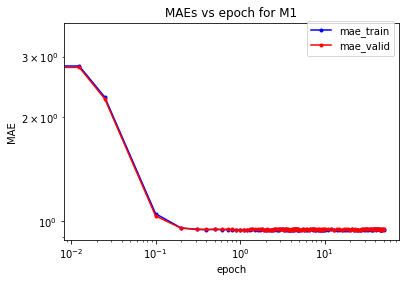

In [67]:
plt.plot(model.trace_epoch, model.trace_mae_train, 'b.-', label = 'mae_train')
plt.plot(model.trace_epoch, model.trace_mae_valid, 'r.-', label = 'mae_valid')
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('MAEs vs epoch for M1')

In [85]:
#Problem 2:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
model_2 = CollabFilterOneScalarPerItem(n_epochs=100, step_size=0.5)
model_2.init_parameter_dict(n_users, n_items, train_tuple)
model_2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.82200 | train_MAE     3.53239 | valid_MAE     3.50620 | grad_wrt_mu     7.10400 | grad_wrt_b_per_user     0.00753 | grad_wrt_c_per_item     0.00423
epoch       0.013 | loss_total     1.18426 | train_MAE     0.93962 | valid_MAE     0.94187 | grad_wrt_mu     0.07603 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082
epoch       0.025 | loss_total     1.23511 | train_MAE     0.94317 | valid_MAE     0.94429 | grad_wrt_mu     0.12661 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084
epoch       0.100 | loss_total     1.28834 | train_MAE     0.93797 | valid_MAE     0.93971 | grad_wrt_mu     0.01212 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00088
epoch       0.200 | loss_total     1.24465 | train_MAE     0.93125 | valid_MAE     0.93359 | grad_wrt_mu     0.14125 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00086
epoch       0.313 | loss_total     1.24821 | train_MAE     0.92916 | valid_

epoch       4.613 | loss_total     1.01324 | train_MAE     0.81530 | valid_MAE     0.82279 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071
epoch       4.713 | loss_total     1.01341 | train_MAE     0.80943 | valid_MAE     0.81832 | grad_wrt_mu     0.08452 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068
epoch       4.800 | loss_total     1.00955 | train_MAE     0.81093 | valid_MAE     0.81908 | grad_wrt_mu     0.06467 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069
epoch       4.900 | loss_total     1.00959 | train_MAE     0.80677 | valid_MAE     0.81585 | grad_wrt_mu     0.00286 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073
epoch       5.000 | loss_total     1.00434 | train_MAE     0.80535 | valid_MAE     0.81457 | grad_wrt_mu     0.01203 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069
epoch       5.250 | loss_total     1.00305 | train_MAE     0.80418 | valid_

epoch      31.000 | loss_total     0.86793 | train_MAE     0.73791 | valid_MAE     0.75213 | grad_wrt_mu     0.06630 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063
epoch      32.000 | loss_total     0.86679 | train_MAE     0.73802 | valid_MAE     0.75206 | grad_wrt_mu     0.05252 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068
epoch      33.000 | loss_total     0.86463 | train_MAE     0.73629 | valid_MAE     0.75083 | grad_wrt_mu     0.13299 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062
epoch      34.000 | loss_total     0.86444 | train_MAE     0.74034 | valid_MAE     0.75346 | grad_wrt_mu     0.01609 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061
epoch      35.000 | loss_total     0.86275 | train_MAE     0.73741 | valid_MAE     0.75130 | grad_wrt_mu     0.11414 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059
epoch      36.000 | loss_total     0.86405 | train_MAE     0.73924 | valid_

/Users/phananh/.conda/envs/comp135_env/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, 'MAEs vs epoch for M2')

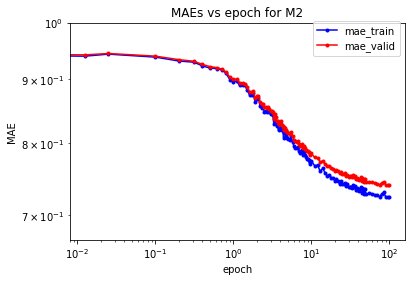

In [86]:
#2a
plt.plot(model_2.trace_epoch, model_2.trace_mae_train, 'b.-', label = 'mae_train')
plt.plot(model_2.trace_epoch, model_2.trace_mae_valid, 'r.-', label = 'mae_valid')
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.ylim([0,1])
plt.title('MAEs vs epoch for M2')

In [87]:
#2c:
#Load models into array
# for each in blah blah.. 
select_movie = []
names = []
p2_select_movie = pd.read_csv('data_movie_lens_100k/select_movies.csv', delimiter = ',')
for i in p2_select_movie['item_id']: 
    select_movie.append(i)
for i in p2_select_movie['title']: 
    names.append(i)
print(select_movie)
for i,j in zip(select_movie,names):
    print(j)
    print(model_2.param_dict['c_per_item'][i])
    print()
    
#plt.plot(model.trace_epoch, (model.param_dict['c_per_item'])[0], 'b.-', label = 'mae_train')

[0, 70, 98, 131, 142, 49, 171, 180, 81, 251, 173, 209, 65, 87, 254, 90, 199, 218, 286, 893]
Toy Story (1995)
0.5696288563914853

Lion King, The (1994)
0.43008068317211057

Snow White and the Seven Dwarfs (1937)
0.39482389631418874

Wizard of Oz, The (1939)
0.7479098158729092

Sound of Music, The (1965)
0.3721750666204736

Star Wars (1977)
1.0432849567315792

Empire Strikes Back, The (1980)
0.8962017259244739

Return of the Jedi (1983)
0.7005972130496689

Jurassic Park (1993)
0.3650406152514954

Lost World: Jurassic Park, The (1997)
-0.4614203735750662

Raiders of the Lost Ark (1981)
1.026563709855685

Indiana Jones and the Last Crusade (1989)
0.6269169756655962

While You Were Sleeping (1995)
0.20928101743795524

Sleepless in Seattle (1993)
0.18277341180020273

My Best Friend's Wedding (1997)
0.013032219029298355

Nightmare Before Christmas, The (1993)
0.2541997341728302

Shining, The (1980)
0.44802717139104475

Nightmare on Elm Street, A (1984)
-0.05150762575229475

Scream (1996)
0.09

In [73]:
#Problem 3a:
k_factor = [2,10,50]
MAE_train_p3 = []
MAE_valid_p3 = []
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()

for i in k_factor:
    model = CollabFilterOneVectorPerItem(n_factors=i, alpha=0.00,n_epochs=700, step_size=0.5)
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    MAE_train_p3.append(model.trace_mae_train)
    MAE_valid_p3.append(model.trace_mae_valid)


epoch       0.000 | loss_total     3.64878 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00258 | grad_wrt_V     0.00136
epoch       0.013 | loss_total     3.63985 | train_MAE     1.42051 | valid_MAE     1.42304 | grad_wrt_mu     0.12090 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00254 | grad_wrt_V     0.00142
epoch       0.025 | loss_total     3.51990 | train_MAE     1.41363 | valid_MAE     1.41728 | grad_wrt_mu     0.03585 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00245 | grad_wrt_V     0.00132
epoch       0.100 | loss_total     3.38766 | train_MAE     1.40062 | valid_MAE     1.40330 | grad_wrt_mu     0.20005 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00245 | grad_wrt_V     0.00133
epoch       0.200 | loss_total     3.10817 | train_MAE     1

epoch       3.713 | loss_total     1.64512 | train_MAE     0.97676 | valid_MAE     0.99935 | grad_wrt_mu     0.00879 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00108 | grad_wrt_V     0.00056
epoch       3.800 | loss_total     1.62977 | train_MAE     0.97800 | valid_MAE     0.99941 | grad_wrt_mu     0.25883 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00124 | grad_wrt_V     0.00063
epoch       3.900 | loss_total     1.60790 | train_MAE     0.96653 | valid_MAE     0.99013 | grad_wrt_mu     0.06008 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00112 | grad_wrt_V     0.00054
epoch       4.000 | loss_total     1.58888 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57100 | train_MAE     0

epoch      13.000 | loss_total     1.04149 | train_MAE     0.80499 | valid_MAE     0.83728 | grad_wrt_mu     0.08228 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00060 | grad_wrt_V     0.00027
epoch      14.000 | loss_total     1.02278 | train_MAE     0.79440 | valid_MAE     0.82836 | grad_wrt_mu     0.03411 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.00818 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99412 | train_MAE     0.78450 | valid_MAE     0.81875 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98158 | train_MAE     0

epoch      49.000 | loss_total     0.85509 | train_MAE     0.73262 | valid_MAE     0.77016 | grad_wrt_mu     0.07887 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      50.000 | loss_total     0.85479 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84884 | train_MAE     0.72607 | valid_MAE     0.76550 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84361 | train_MAE     0.72259 | valid_MAE     0.76323 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83980 | train_MAE     0

epoch     220.000 | loss_total     0.78584 | train_MAE     0.70038 | valid_MAE     0.75385 | grad_wrt_mu     0.02539 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.78564 | train_MAE     0.69796 | valid_MAE     0.75243 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0.69627 | valid_MAE     0.75167 | grad_wrt_mu     0.06643 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78304 | train_MAE     0.69652 | valid_MAE     0.75183 | grad_wrt_mu     0.04975 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78209 | train_MAE     0

epoch     395.000 | loss_total     0.75022 | train_MAE     0.68430 | valid_MAE     0.74446 | grad_wrt_mu     0.16839 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch     400.000 | loss_total     0.75038 | train_MAE     0.67955 | valid_MAE     0.74232 | grad_wrt_mu     0.02691 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00052 | grad_wrt_V     0.00019
epoch     405.000 | loss_total     0.74819 | train_MAE     0.68142 | valid_MAE     0.74284 | grad_wrt_mu     0.00150 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00051 | grad_wrt_V     0.00019
epoch     410.000 | loss_total     0.74662 | train_MAE     0.68005 | valid_MAE     0.74218 | grad_wrt_mu     0.05044 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00044 | grad_wrt_V     0.00018
epoch     415.000 | loss_total     0.74846 | train_MAE     0

epoch     570.000 | loss_total     0.73022 | train_MAE     0.66991 | valid_MAE     0.73767 | grad_wrt_mu     0.08538 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch     575.000 | loss_total     0.72920 | train_MAE     0.66996 | valid_MAE     0.73731 | grad_wrt_mu     0.08413 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00048 | grad_wrt_V     0.00021
epoch     580.000 | loss_total     0.72812 | train_MAE     0.67193 | valid_MAE     0.73771 | grad_wrt_mu     0.02608 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00051 | grad_wrt_V     0.00020
epoch     585.000 | loss_total     0.72792 | train_MAE     0.67156 | valid_MAE     0.73750 | grad_wrt_mu     0.04508 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch     590.000 | loss_total     0.72783 | train_MAE     0

epoch       0.613 | loss_total     8.69989 | train_MAE     2.26695 | valid_MAE     2.28071 | grad_wrt_mu     0.40579 | grad_wrt_b_per_user     0.00349 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00294 | grad_wrt_V     0.00172
epoch       0.713 | loss_total     8.40666 | train_MAE     2.21350 | valid_MAE     2.23140 | grad_wrt_mu     0.08175 | grad_wrt_b_per_user     0.00341 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00290 | grad_wrt_V     0.00167
epoch       0.800 | loss_total     8.20258 | train_MAE     2.17060 | valid_MAE     2.19143 | grad_wrt_mu     0.27309 | grad_wrt_b_per_user     0.00307 | grad_wrt_c_per_item     0.00198 | grad_wrt_U     0.00287 | grad_wrt_V     0.00166
epoch       0.900 | loss_total     7.44135 | train_MAE     2.12776 | valid_MAE     2.15203 | grad_wrt_mu     0.47536 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00183 | grad_wrt_U     0.00262 | grad_wrt_V     0.00150
epoch       1.000 | loss_total     6.71811 | train_MAE     2

epoch       4.400 | loss_total     3.28168 | train_MAE     1.32882 | valid_MAE     1.40797 | grad_wrt_mu     0.13158 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00132 | grad_wrt_V     0.00073
epoch       4.500 | loss_total     3.23059 | train_MAE     1.31757 | valid_MAE     1.39787 | grad_wrt_mu     0.00573 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00126 | grad_wrt_U     0.00138 | grad_wrt_V     0.00075
epoch       4.613 | loss_total     3.16033 | train_MAE     1.30468 | valid_MAE     1.38636 | grad_wrt_mu     0.02001 | grad_wrt_b_per_user     0.00191 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00124 | grad_wrt_V     0.00068
epoch       4.713 | loss_total     3.11363 | train_MAE     1.29485 | valid_MAE     1.37707 | grad_wrt_mu     0.06582 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00129 | grad_wrt_V     0.00070
epoch       4.800 | loss_total     3.07329 | train_MAE     1

epoch      19.000 | loss_total     1.16936 | train_MAE     0.83301 | valid_MAE     0.94524 | grad_wrt_mu     0.09322 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00057 | grad_wrt_V     0.00029
epoch      20.000 | loss_total     1.13910 | train_MAE     0.82376 | valid_MAE     0.93703 | grad_wrt_mu     0.00955 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00054 | grad_wrt_V     0.00028
epoch      21.000 | loss_total     1.11300 | train_MAE     0.81763 | valid_MAE     0.93135 | grad_wrt_mu     0.03731 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00055 | grad_wrt_V     0.00027
epoch      22.000 | loss_total     1.09068 | train_MAE     0.80816 | valid_MAE     0.92331 | grad_wrt_mu     0.07573 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00056 | grad_wrt_V     0.00029
epoch      23.000 | loss_total     1.06563 | train_MAE     0

epoch      70.000 | loss_total     0.77855 | train_MAE     0.69454 | valid_MAE     0.83549 | grad_wrt_mu     0.00738 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch      75.000 | loss_total     0.76841 | train_MAE     0.69103 | valid_MAE     0.83371 | grad_wrt_mu     0.03513 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.76222 | train_MAE     0.68891 | valid_MAE     0.83293 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch      85.000 | loss_total     0.75621 | train_MAE     0.68234 | valid_MAE     0.82945 | grad_wrt_mu     0.11251 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      90.000 | loss_total     0.75019 | train_MAE     0

epoch     245.000 | loss_total     0.65124 | train_MAE     0.63090 | valid_MAE     0.82943 | grad_wrt_mu     0.02682 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     250.000 | loss_total     0.64995 | train_MAE     0.62857 | valid_MAE     0.82894 | grad_wrt_mu     0.04782 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     255.000 | loss_total     0.64756 | train_MAE     0.62721 | valid_MAE     0.82909 | grad_wrt_mu     0.12040 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch     260.000 | loss_total     0.64498 | train_MAE     0.62670 | valid_MAE     0.82959 | grad_wrt_mu     0.01726 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     265.000 | loss_total     0.64361 | train_MAE     0

epoch     420.000 | loss_total     0.58947 | train_MAE     0.59638 | valid_MAE     0.83527 | grad_wrt_mu     0.07352 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     425.000 | loss_total     0.58675 | train_MAE     0.59720 | valid_MAE     0.83599 | grad_wrt_mu     0.03115 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00049 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     430.000 | loss_total     0.58653 | train_MAE     0.59591 | valid_MAE     0.83585 | grad_wrt_mu     0.08377 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00049 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch     435.000 | loss_total     0.58422 | train_MAE     0.59464 | valid_MAE     0.83576 | grad_wrt_mu     0.01720 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     440.000 | loss_total     0.58334 | train_MAE     0

epoch     595.000 | loss_total     0.54852 | train_MAE     0.57564 | valid_MAE     0.84006 | grad_wrt_mu     0.06398 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     600.000 | loss_total     0.54707 | train_MAE     0.57433 | valid_MAE     0.83994 | grad_wrt_mu     0.05459 | grad_wrt_b_per_user     0.00080 | grad_wrt_c_per_item     0.00048 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     605.000 | loss_total     0.54629 | train_MAE     0.57418 | valid_MAE     0.84009 | grad_wrt_mu     0.02274 | grad_wrt_b_per_user     0.00080 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     610.000 | loss_total     0.54601 | train_MAE     0.57417 | valid_MAE     0.84039 | grad_wrt_mu     0.01066 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00048 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     615.000 | loss_total     0.54497 | train_MAE     0

epoch       1.100 | loss_total    23.81799 | train_MAE     3.93716 | valid_MAE     4.33071 | grad_wrt_mu     0.37484 | grad_wrt_b_per_user     0.00569 | grad_wrt_c_per_item     0.00322 | grad_wrt_U     0.00440 | grad_wrt_V     0.00246
epoch       1.200 | loss_total    24.64363 | train_MAE     3.84665 | valid_MAE     4.25878 | grad_wrt_mu     0.64077 | grad_wrt_b_per_user     0.00571 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00446 | grad_wrt_V     0.00251
epoch       1.313 | loss_total    21.77241 | train_MAE     3.73577 | valid_MAE     4.17829 | grad_wrt_mu     0.53037 | grad_wrt_b_per_user     0.00511 | grad_wrt_c_per_item     0.00326 | grad_wrt_U     0.00413 | grad_wrt_V     0.00239
epoch       1.400 | loss_total    23.49156 | train_MAE     3.66867 | valid_MAE     4.12828 | grad_wrt_mu     0.71846 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00340 | grad_wrt_U     0.00427 | grad_wrt_V     0.00244
epoch       1.500 | loss_total    23.02254 | train_MAE     3

epoch       4.613 | loss_total     8.99653 | train_MAE     2.10745 | valid_MAE     2.88923 | grad_wrt_mu     0.44811 | grad_wrt_b_per_user     0.00345 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00229 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     8.75950 | train_MAE     2.08096 | valid_MAE     2.86717 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57108 | train_MAE     2.05924 | valid_MAE     2.84898 | grad_wrt_mu     0.06388 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00235 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.34298 | train_MAE     2.03316 | valid_MAE     2.82790 | grad_wrt_mu     0.14022 | grad_wrt_b_per_user     0.00318 | grad_wrt_c_per_item     0.00190 | grad_wrt_U     0.00209 | grad_wrt_V     0.00113
epoch       5.000 | loss_total     8.12513 | train_MAE     2

epoch      21.000 | loss_total     1.32669 | train_MAE     0.87659 | valid_MAE     1.82069 | grad_wrt_mu     0.02848 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00035
epoch      22.000 | loss_total     1.25984 | train_MAE     0.85718 | valid_MAE     1.80227 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20083 | train_MAE     0.83839 | valid_MAE     1.78424 | grad_wrt_mu     0.24229 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00067 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.14820 | train_MAE     0.82090 | valid_MAE     1.76794 | grad_wrt_mu     0.03612 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00061 | grad_wrt_V     0.00032
epoch      25.000 | loss_total     1.09902 | train_MAE     0

epoch      80.000 | loss_total     0.49311 | train_MAE     0.52649 | valid_MAE     1.50526 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00032 | grad_wrt_V     0.00013
epoch      85.000 | loss_total     0.47969 | train_MAE     0.51878 | valid_MAE     1.50012 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46879 | train_MAE     0.51069 | valid_MAE     1.49552 | grad_wrt_mu     0.06753 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00030 | grad_wrt_V     0.00013
epoch      95.000 | loss_total     0.45882 | train_MAE     0.50356 | valid_MAE     1.49159 | grad_wrt_mu     0.01605 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00012
epoch     100.000 | loss_total     0.45053 | train_MAE     0

epoch     255.000 | loss_total     0.31911 | train_MAE     0.40211 | valid_MAE     1.48577 | grad_wrt_mu     0.02462 | grad_wrt_b_per_user     0.00054 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     260.000 | loss_total     0.31644 | train_MAE     0.39954 | valid_MAE     1.48637 | grad_wrt_mu     0.00579 | grad_wrt_b_per_user     0.00056 | grad_wrt_c_per_item     0.00032 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     265.000 | loss_total     0.31381 | train_MAE     0.39763 | valid_MAE     1.48721 | grad_wrt_mu     0.00537 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00032 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     270.000 | loss_total     0.31104 | train_MAE     0.39625 | valid_MAE     1.48815 | grad_wrt_mu     0.10376 | grad_wrt_b_per_user     0.00050 | grad_wrt_c_per_item     0.00031 | grad_wrt_U     0.00021 | grad_wrt_V     0.00009
epoch     275.000 | loss_total     0.30917 | train_MAE     0

epoch     430.000 | loss_total     0.24800 | train_MAE     0.34797 | valid_MAE     1.51847 | grad_wrt_mu     0.03315 | grad_wrt_b_per_user     0.00045 | grad_wrt_c_per_item     0.00028 | grad_wrt_U     0.00019 | grad_wrt_V     0.00009
epoch     435.000 | loss_total     0.24677 | train_MAE     0.34629 | valid_MAE     1.51947 | grad_wrt_mu     0.02882 | grad_wrt_b_per_user     0.00048 | grad_wrt_c_per_item     0.00027 | grad_wrt_U     0.00018 | grad_wrt_V     0.00008
epoch     440.000 | loss_total     0.24538 | train_MAE     0.34505 | valid_MAE     1.52033 | grad_wrt_mu     0.05133 | grad_wrt_b_per_user     0.00043 | grad_wrt_c_per_item     0.00030 | grad_wrt_U     0.00019 | grad_wrt_V     0.00009
epoch     445.000 | loss_total     0.24456 | train_MAE     0.34406 | valid_MAE     1.52131 | grad_wrt_mu     0.06939 | grad_wrt_b_per_user     0.00051 | grad_wrt_c_per_item     0.00029 | grad_wrt_U     0.00020 | grad_wrt_V     0.00009
epoch     450.000 | loss_total     0.24239 | train_MAE     0

epoch     605.000 | loss_total     0.20299 | train_MAE     0.31226 | valid_MAE     1.55188 | grad_wrt_mu     0.03911 | grad_wrt_b_per_user     0.00043 | grad_wrt_c_per_item     0.00025 | grad_wrt_U     0.00017 | grad_wrt_V     0.00008
epoch     610.000 | loss_total     0.20259 | train_MAE     0.30926 | valid_MAE     1.55246 | grad_wrt_mu     0.01257 | grad_wrt_b_per_user     0.00044 | grad_wrt_c_per_item     0.00025 | grad_wrt_U     0.00017 | grad_wrt_V     0.00008
epoch     615.000 | loss_total     0.20108 | train_MAE     0.30837 | valid_MAE     1.55330 | grad_wrt_mu     0.01700 | grad_wrt_b_per_user     0.00040 | grad_wrt_c_per_item     0.00024 | grad_wrt_U     0.00016 | grad_wrt_V     0.00008
epoch     620.000 | loss_total     0.20029 | train_MAE     0.30761 | valid_MAE     1.55423 | grad_wrt_mu     0.04167 | grad_wrt_b_per_user     0.00038 | grad_wrt_c_per_item     0.00026 | grad_wrt_U     0.00016 | grad_wrt_V     0.00008
epoch     625.000 | loss_total     0.19901 | train_MAE     0

Text(0.5, 1.0, 'MAEs vs epoch for M2')

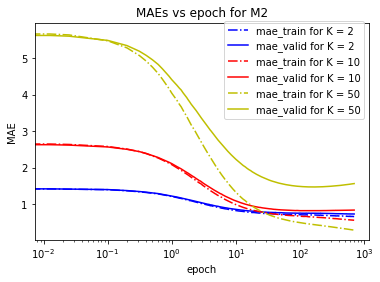

In [80]:
plt.plot(model.trace_epoch, MAE_train_p3[0], 'b-.', label = 'mae_train for K = 2')
plt.plot(model.trace_epoch, MAE_valid_p3[0], 'b', label = 'mae_valid for K = 2')
plt.plot(model.trace_epoch, MAE_train_p3[1], 'r-.', label = 'mae_train for K = 10')
plt.plot(model.trace_epoch, MAE_valid_p3[1], 'r', label = 'mae_valid for K = 10')
plt.plot(model.trace_epoch, MAE_train_p3[2], 'y-.', label = 'mae_train for K = 50')
plt.plot(model.trace_epoch, MAE_valid_p3[2], 'y', label = 'mae_valid for K = 50')
# plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('MAEs vs epoch for M3a')

In [82]:
#Problem 3b
k_factor = [2,10,50]
MAE_train_p3 = []
MAE_valid_p3 = []
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()

for i in k_factor:
    model = CollabFilterOneVectorPerItem(n_factors=i, alpha=0.75,n_epochs=700, step_size=0.5)
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    MAE_train_p3.append(model.trace_mae_train)
    MAE_valid_p3.append(model.trace_mae_valid)

epoch       0.000 | loss_total     7.78304 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00364 | grad_wrt_V     0.00247
epoch       0.013 | loss_total     7.75455 | train_MAE     1.41934 | valid_MAE     1.42189 | grad_wrt_mu     0.12103 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00359 | grad_wrt_V     0.00253
epoch       0.025 | loss_total     7.61546 | train_MAE     1.41130 | valid_MAE     1.41499 | grad_wrt_mu     0.03567 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00351 | grad_wrt_V     0.00244
epoch       0.100 | loss_total     7.37401 | train_MAE     1.39176 | valid_MAE     1.39453 | grad_wrt_mu     0.19887 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00345 | grad_wrt_V     0.00241
epoch       0.200 | loss_total     6.96999 | train_MAE     1

epoch       3.900 | loss_total     3.55279 | train_MAE     0.89252 | valid_MAE     0.91115 | grad_wrt_mu     0.06289 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00145 | grad_wrt_V     0.00119
epoch       4.000 | loss_total     3.50200 | train_MAE     0.88842 | valid_MAE     0.90708 | grad_wrt_mu     0.00846 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00143 | grad_wrt_V     0.00122
epoch       4.100 | loss_total     3.45425 | train_MAE     0.88403 | valid_MAE     0.90287 | grad_wrt_mu     0.01226 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00140 | grad_wrt_V     0.00117
epoch       4.200 | loss_total     3.40721 | train_MAE     0.88669 | valid_MAE     0.90406 | grad_wrt_mu     0.18578 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00141 | grad_wrt_V     0.00118
epoch       4.313 | loss_total     3.35544 | train_MAE     0

epoch      14.000 | loss_total     1.49722 | train_MAE     0.75892 | valid_MAE     0.77737 | grad_wrt_mu     0.04390 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00058 | grad_wrt_V     0.00053
epoch      15.000 | loss_total     1.42497 | train_MAE     0.75697 | valid_MAE     0.77482 | grad_wrt_mu     0.02088 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00054 | grad_wrt_V     0.00050
epoch      16.000 | loss_total     1.35887 | train_MAE     0.75297 | valid_MAE     0.77115 | grad_wrt_mu     0.04968 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00052 | grad_wrt_V     0.00048
epoch      17.000 | loss_total     1.30150 | train_MAE     0.74920 | valid_MAE     0.76808 | grad_wrt_mu     0.13874 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00045
epoch      18.000 | loss_total     1.25014 | train_MAE     0

epoch      50.000 | loss_total     0.86195 | train_MAE     0.73494 | valid_MAE     0.74868 | grad_wrt_mu     0.08538 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00007 | grad_wrt_V     0.00007
epoch      55.000 | loss_total     0.85588 | train_MAE     0.72751 | valid_MAE     0.74353 | grad_wrt_mu     0.14332 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00005 | grad_wrt_V     0.00005
epoch      60.000 | loss_total     0.85165 | train_MAE     0.72555 | valid_MAE     0.74228 | grad_wrt_mu     0.16120 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00004 | grad_wrt_V     0.00004
epoch      65.000 | loss_total     0.84921 | train_MAE     0.72532 | valid_MAE     0.74164 | grad_wrt_mu     0.05217 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00003 | grad_wrt_V     0.00003
epoch      70.000 | loss_total     0.84598 | train_MAE     0

epoch     225.000 | loss_total     0.83499 | train_MAE     0.72097 | valid_MAE     0.73828 | grad_wrt_mu     0.01376 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     230.000 | loss_total     0.83446 | train_MAE     0.71965 | valid_MAE     0.73752 | grad_wrt_mu     0.07534 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     235.000 | loss_total     0.83493 | train_MAE     0.72023 | valid_MAE     0.73786 | grad_wrt_mu     0.05053 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     240.000 | loss_total     0.83472 | train_MAE     0.72221 | valid_MAE     0.73918 | grad_wrt_mu     0.10411 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     245.000 | loss_total     0.83524 | train_MAE     0

epoch     400.000 | loss_total     0.83428 | train_MAE     0.71779 | valid_MAE     0.73709 | grad_wrt_mu     0.05691 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     405.000 | loss_total     0.83203 | train_MAE     0.72084 | valid_MAE     0.73860 | grad_wrt_mu     0.01295 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     410.000 | loss_total     0.83214 | train_MAE     0.71920 | valid_MAE     0.73755 | grad_wrt_mu     0.06523 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     415.000 | loss_total     0.83359 | train_MAE     0.71774 | valid_MAE     0.73713 | grad_wrt_mu     0.10126 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     420.000 | loss_total     0.83329 | train_MAE     0

epoch     575.000 | loss_total     0.83332 | train_MAE     0.71891 | valid_MAE     0.73768 | grad_wrt_mu     0.03757 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     580.000 | loss_total     0.83238 | train_MAE     0.72122 | valid_MAE     0.73926 | grad_wrt_mu     0.01143 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     585.000 | loss_total     0.83188 | train_MAE     0.72056 | valid_MAE     0.73879 | grad_wrt_mu     0.06712 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     590.000 | loss_total     0.83275 | train_MAE     0.71908 | valid_MAE     0.73780 | grad_wrt_mu     0.00571 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     595.000 | loss_total     0.83311 | train_MAE     0

epoch       1.100 | loss_total    20.70316 | train_MAE     1.85800 | valid_MAE     1.88343 | grad_wrt_mu     0.00691 | grad_wrt_b_per_user     0.00259 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00278 | grad_wrt_V     0.00205
epoch       1.200 | loss_total    21.07726 | train_MAE     1.80991 | valid_MAE     1.83733 | grad_wrt_mu     0.15345 | grad_wrt_b_per_user     0.00282 | grad_wrt_c_per_item     0.00160 | grad_wrt_U     0.00296 | grad_wrt_V     0.00213
epoch       1.313 | loss_total    19.93095 | train_MAE     1.76188 | valid_MAE     1.79156 | grad_wrt_mu     0.21302 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00149 | grad_wrt_U     0.00266 | grad_wrt_V     0.00200
epoch       1.400 | loss_total    19.89668 | train_MAE     1.72543 | valid_MAE     1.75648 | grad_wrt_mu     0.43398 | grad_wrt_b_per_user     0.00263 | grad_wrt_c_per_item     0.00147 | grad_wrt_U     0.00273 | grad_wrt_V     0.00199
epoch       1.500 | loss_total    19.07189 | train_MAE     1

epoch       5.000 | loss_total    10.94398 | train_MAE     1.01346 | valid_MAE     1.05619 | grad_wrt_mu     0.14699 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00131 | grad_wrt_V     0.00111
epoch       5.250 | loss_total    10.52988 | train_MAE     0.99461 | valid_MAE     1.03637 | grad_wrt_mu     0.00337 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00129 | grad_wrt_V     0.00107
epoch       5.500 | loss_total    10.15729 | train_MAE     0.97599 | valid_MAE     1.01734 | grad_wrt_mu     0.07668 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00121 | grad_wrt_V     0.00105
epoch       5.750 | loss_total     9.80234 | train_MAE     0.95734 | valid_MAE     0.99899 | grad_wrt_mu     0.14358 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00120 | grad_wrt_V     0.00103
epoch       6.000 | loss_total     9.45656 | train_MAE     0

epoch      25.000 | loss_total     1.62130 | train_MAE     0.73797 | valid_MAE     0.75846 | grad_wrt_mu     0.02537 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00029 | grad_wrt_V     0.00027
epoch      26.000 | loss_total     1.53544 | train_MAE     0.73654 | valid_MAE     0.75679 | grad_wrt_mu     0.01252 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00027 | grad_wrt_V     0.00026
epoch      27.000 | loss_total     1.46066 | train_MAE     0.73701 | valid_MAE     0.75648 | grad_wrt_mu     0.10637 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00026 | grad_wrt_V     0.00024
epoch      28.000 | loss_total     1.39321 | train_MAE     0.73330 | valid_MAE     0.75374 | grad_wrt_mu     0.11014 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00024 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     1.33278 | train_MAE     0

epoch     100.000 | loss_total     0.84203 | train_MAE     0.72256 | valid_MAE     0.73923 | grad_wrt_mu     0.06817 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     105.000 | loss_total     0.84087 | train_MAE     0.72499 | valid_MAE     0.74073 | grad_wrt_mu     0.07607 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     110.000 | loss_total     0.84027 | train_MAE     0.72459 | valid_MAE     0.74046 | grad_wrt_mu     0.06185 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     115.000 | loss_total     0.83897 | train_MAE     0.72224 | valid_MAE     0.73896 | grad_wrt_mu     0.01068 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     120.000 | loss_total     0.83857 | train_MAE     0

epoch     275.000 | loss_total     0.83505 | train_MAE     0.72049 | valid_MAE     0.73814 | grad_wrt_mu     0.02254 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     280.000 | loss_total     0.83353 | train_MAE     0.71959 | valid_MAE     0.73763 | grad_wrt_mu     0.02389 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     285.000 | loss_total     0.83483 | train_MAE     0.71963 | valid_MAE     0.73769 | grad_wrt_mu     0.03153 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     290.000 | loss_total     0.83267 | train_MAE     0.72149 | valid_MAE     0.73887 | grad_wrt_mu     0.09831 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     295.000 | loss_total     0.83481 | train_MAE     0

epoch     450.000 | loss_total     0.83391 | train_MAE     0.71903 | valid_MAE     0.73758 | grad_wrt_mu     0.00597 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     455.000 | loss_total     0.83385 | train_MAE     0.72434 | valid_MAE     0.74128 | grad_wrt_mu     0.05391 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     460.000 | loss_total     0.83461 | train_MAE     0.71977 | valid_MAE     0.73804 | grad_wrt_mu     0.03168 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     465.000 | loss_total     0.83363 | train_MAE     0.72124 | valid_MAE     0.73902 | grad_wrt_mu     0.17123 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     470.000 | loss_total     0.83348 | train_MAE     0

epoch     625.000 | loss_total     0.83283 | train_MAE     0.71919 | valid_MAE     0.73795 | grad_wrt_mu     0.00052 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     630.000 | loss_total     0.83396 | train_MAE     0.72234 | valid_MAE     0.74016 | grad_wrt_mu     0.11019 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     635.000 | loss_total     0.83156 | train_MAE     0.72107 | valid_MAE     0.73925 | grad_wrt_mu     0.09191 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     640.000 | loss_total     0.83303 | train_MAE     0.72011 | valid_MAE     0.73856 | grad_wrt_mu     0.10223 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     645.000 | loss_total     0.83164 | train_MAE     0

epoch       1.713 | loss_total    85.46659 | train_MAE     2.91130 | valid_MAE     3.31440 | grad_wrt_mu     0.34401 | grad_wrt_b_per_user     0.00458 | grad_wrt_c_per_item     0.00253 | grad_wrt_U     0.00374 | grad_wrt_V     0.00252
epoch       1.800 | loss_total    83.79280 | train_MAE     2.83100 | valid_MAE     3.24194 | grad_wrt_mu     0.12064 | grad_wrt_b_per_user     0.00444 | grad_wrt_c_per_item     0.00253 | grad_wrt_U     0.00363 | grad_wrt_V     0.00246
epoch       1.900 | loss_total    82.46627 | train_MAE     2.74804 | valid_MAE     3.16714 | grad_wrt_mu     0.26942 | grad_wrt_b_per_user     0.00450 | grad_wrt_c_per_item     0.00255 | grad_wrt_U     0.00357 | grad_wrt_V     0.00245
epoch       2.000 | loss_total    78.54377 | train_MAE     2.66822 | valid_MAE     3.09239 | grad_wrt_mu     0.03510 | grad_wrt_b_per_user     0.00385 | grad_wrt_c_per_item     0.00226 | grad_wrt_U     0.00321 | grad_wrt_V     0.00226
epoch       2.100 | loss_total    87.41780 | train_MAE     2

epoch       5.500 | loss_total    46.91923 | train_MAE     1.32865 | valid_MAE     1.73002 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00112 | grad_wrt_U     0.00147 | grad_wrt_V     0.00116
epoch       5.750 | loss_total    45.23544 | train_MAE     1.28472 | valid_MAE     1.67857 | grad_wrt_mu     0.15421 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00118 | grad_wrt_U     0.00142 | grad_wrt_V     0.00116
epoch       6.000 | loss_total    43.61122 | train_MAE     1.24225 | valid_MAE     1.62824 | grad_wrt_mu     0.12069 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00129 | grad_wrt_V     0.00106
epoch       6.250 | loss_total    42.07941 | train_MAE     1.20296 | valid_MAE     1.58060 | grad_wrt_mu     0.07913 | grad_wrt_b_per_user     0.00182 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00132 | grad_wrt_V     0.00108
epoch       6.500 | loss_total    40.64997 | train_MAE     1

epoch      27.000 | loss_total     3.97195 | train_MAE     0.71427 | valid_MAE     0.76683 | grad_wrt_mu     0.06423 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00026 | grad_wrt_V     0.00025
epoch      28.000 | loss_total     3.62376 | train_MAE     0.71582 | valid_MAE     0.76470 | grad_wrt_mu     0.04306 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00025 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     3.31470 | train_MAE     0.71468 | valid_MAE     0.76177 | grad_wrt_mu     0.12646 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00024 | grad_wrt_V     0.00022
epoch      30.000 | loss_total     3.04045 | train_MAE     0.71890 | valid_MAE     0.76149 | grad_wrt_mu     0.06578 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00023 | grad_wrt_V     0.00021
epoch      31.000 | loss_total     2.79692 | train_MAE     0

epoch     110.000 | loss_total     0.84006 | train_MAE     0.72475 | valid_MAE     0.74067 | grad_wrt_mu     0.05912 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     115.000 | loss_total     0.83939 | train_MAE     0.72352 | valid_MAE     0.73985 | grad_wrt_mu     0.02698 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     120.000 | loss_total     0.83858 | train_MAE     0.72172 | valid_MAE     0.73878 | grad_wrt_mu     0.09850 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     125.000 | loss_total     0.83963 | train_MAE     0.72179 | valid_MAE     0.73878 | grad_wrt_mu     0.04946 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     130.000 | loss_total     0.83773 | train_MAE     0

epoch     285.000 | loss_total     0.83521 | train_MAE     0.71955 | valid_MAE     0.73758 | grad_wrt_mu     0.00507 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     290.000 | loss_total     0.83447 | train_MAE     0.72273 | valid_MAE     0.73967 | grad_wrt_mu     0.05264 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     295.000 | loss_total     0.83474 | train_MAE     0.71917 | valid_MAE     0.73739 | grad_wrt_mu     0.07861 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     300.000 | loss_total     0.83368 | train_MAE     0.71833 | valid_MAE     0.73821 | grad_wrt_mu     0.10886 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     305.000 | loss_total     0.83402 | train_MAE     0

epoch     460.000 | loss_total     0.83434 | train_MAE     0.72294 | valid_MAE     0.74021 | grad_wrt_mu     0.04140 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     465.000 | loss_total     0.83356 | train_MAE     0.72051 | valid_MAE     0.73850 | grad_wrt_mu     0.11845 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     470.000 | loss_total     0.83284 | train_MAE     0.71789 | valid_MAE     0.73710 | grad_wrt_mu     0.00812 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     475.000 | loss_total     0.83390 | train_MAE     0.71808 | valid_MAE     0.73714 | grad_wrt_mu     0.18964 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     480.000 | loss_total     0.83172 | train_MAE     0

epoch     635.000 | loss_total     0.83239 | train_MAE     0.71798 | valid_MAE     0.73732 | grad_wrt_mu     0.02891 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     640.000 | loss_total     0.83355 | train_MAE     0.72276 | valid_MAE     0.74048 | grad_wrt_mu     0.06332 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     645.000 | loss_total     0.83212 | train_MAE     0.71767 | valid_MAE     0.73721 | grad_wrt_mu     0.05798 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     650.000 | loss_total     0.83139 | train_MAE     0.72420 | valid_MAE     0.74158 | grad_wrt_mu     0.22978 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     655.000 | loss_total     0.83348 | train_MAE     0

Text(0.5, 1.0, 'MAEs vs epoch for M3a')

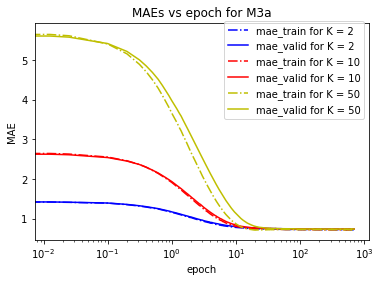

In [84]:
plt.plot(model.trace_epoch, MAE_train_p3[0], 'b-.', label = 'mae_train for K = 2')
plt.plot(model.trace_epoch, MAE_valid_p3[0], 'b', label = 'mae_valid for K = 2')
plt.plot(model.trace_epoch, MAE_train_p3[1], 'r-.', label = 'mae_train for K = 10')
plt.plot(model.trace_epoch, MAE_valid_p3[1], 'r', label = 'mae_valid for K = 10')
plt.plot(model.trace_epoch, MAE_train_p3[2], 'y-.', label = 'mae_train for K = 50')
plt.plot(model.trace_epoch, MAE_valid_p3[2], 'y', label = 'mae_valid for K = 50')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('MAEs vs epoch for M3b')

In [91]:
#Problem 3C
#Load models into array
# for each in blah blah.. 
model = CollabFilterOneVectorPerItem(n_factors=2, alpha=0,n_epochs=700, step_size=0.5)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)
select_movie = []
names = []
v1 = []
v2 = []
p2_select_movie = pd.read_csv('data_movie_lens_100k/select_movies.csv', delimiter = ',')
for i in p2_select_movie['item_id']: 
    select_movie.append(i)
for i in p2_select_movie['title']: 
    names.append(i)
print(select_movie)


epoch       0.000 | loss_total     3.64878 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00258 | grad_wrt_V     0.00136
epoch       0.013 | loss_total     3.63985 | train_MAE     1.42051 | valid_MAE     1.42304 | grad_wrt_mu     0.12090 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00254 | grad_wrt_V     0.00142
epoch       0.025 | loss_total     3.51990 | train_MAE     1.41363 | valid_MAE     1.41728 | grad_wrt_mu     0.03585 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00245 | grad_wrt_V     0.00132
epoch       0.100 | loss_total     3.38766 | train_MAE     1.40062 | valid_MAE     1.40330 | grad_wrt_mu     0.20005 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00245 | grad_wrt_V     0.00133
epoch       0.200 | loss_total     3.10817 | train_MAE     1

epoch       3.400 | loss_total     1.71590 | train_MAE     0.99231 | valid_MAE     1.01414 | grad_wrt_mu     0.13592 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00112 | grad_wrt_V     0.00057
epoch       3.500 | loss_total     1.68628 | train_MAE     0.98894 | valid_MAE     1.01042 | grad_wrt_mu     0.08286 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00107 | grad_wrt_V     0.00053
epoch       3.613 | loss_total     1.66908 | train_MAE     0.98104 | valid_MAE     1.00366 | grad_wrt_mu     0.11389 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00121 | grad_wrt_V     0.00061
epoch       3.713 | loss_total     1.64512 | train_MAE     0.97676 | valid_MAE     0.99935 | grad_wrt_mu     0.00879 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00108 | grad_wrt_V     0.00056
epoch       3.800 | loss_total     1.62977 | train_MAE     0

epoch       9.750 | loss_total     1.12777 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11839 | train_MAE     0.82758 | valid_MAE     0.85949 | grad_wrt_mu     0.01266 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00067 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.08957 | train_MAE     0.81775 | valid_MAE     0.85018 | grad_wrt_mu     0.05579 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00030
epoch      12.000 | loss_total     1.06348 | train_MAE     0.81091 | valid_MAE     0.84323 | grad_wrt_mu     0.04835 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00066 | grad_wrt_V     0.00030
epoch      13.000 | loss_total     1.04149 | train_MAE     0

epoch      45.000 | loss_total     0.86171 | train_MAE     0.73057 | valid_MAE     0.76988 | grad_wrt_mu     0.07234 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch      46.000 | loss_total     0.85931 | train_MAE     0.73177 | valid_MAE     0.77007 | grad_wrt_mu     0.03288 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00016
epoch      47.000 | loss_total     0.85691 | train_MAE     0.72997 | valid_MAE     0.76894 | grad_wrt_mu     0.03348 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      48.000 | loss_total     0.85738 | train_MAE     0.73088 | valid_MAE     0.76919 | grad_wrt_mu     0.01906 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch      49.000 | loss_total     0.85509 | train_MAE     0

epoch     200.000 | loss_total     0.79237 | train_MAE     0.69911 | valid_MAE     0.75275 | grad_wrt_mu     0.19115 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     205.000 | loss_total     0.79054 | train_MAE     0.70441 | valid_MAE     0.75604 | grad_wrt_mu     0.06436 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     210.000 | loss_total     0.78922 | train_MAE     0.70655 | valid_MAE     0.75780 | grad_wrt_mu     0.08157 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.78863 | train_MAE     0.69763 | valid_MAE     0.75218 | grad_wrt_mu     0.08439 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     220.000 | loss_total     0.78584 | train_MAE     0

epoch     375.000 | loss_total     0.75345 | train_MAE     0.68469 | valid_MAE     0.74472 | grad_wrt_mu     0.01836 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00051 | grad_wrt_V     0.00017
epoch     380.000 | loss_total     0.75280 | train_MAE     0.68147 | valid_MAE     0.74314 | grad_wrt_mu     0.12599 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch     385.000 | loss_total     0.75157 | train_MAE     0.68283 | valid_MAE     0.74363 | grad_wrt_mu     0.03146 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch     390.000 | loss_total     0.75099 | train_MAE     0.68295 | valid_MAE     0.74371 | grad_wrt_mu     0.10494 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch     395.000 | loss_total     0.75022 | train_MAE     0

epoch     550.000 | loss_total     0.73126 | train_MAE     0.67494 | valid_MAE     0.73924 | grad_wrt_mu     0.13696 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00053 | grad_wrt_V     0.00018
epoch     555.000 | loss_total     0.73137 | train_MAE     0.67215 | valid_MAE     0.73797 | grad_wrt_mu     0.03765 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00050 | grad_wrt_V     0.00020
epoch     560.000 | loss_total     0.73083 | train_MAE     0.67365 | valid_MAE     0.73857 | grad_wrt_mu     0.04119 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00051 | grad_wrt_V     0.00019
epoch     565.000 | loss_total     0.72991 | train_MAE     0.67231 | valid_MAE     0.73796 | grad_wrt_mu     0.03188 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch     570.000 | loss_total     0.73022 | train_MAE     0

Toy Story (1995)
[-0.27087036  0.09172067]
Lion King, The (1994)
[-0.7371705   0.69371596]
Snow White and the Seven Dwarfs (1937)
[0.2036868  0.40375457]
Wizard of Oz, The (1939)
[0.38576404 0.43367896]
Sound of Music, The (1965)
[-0.34646359  1.25915353]
Star Wars (1977)
[-0.12259784 -0.06143835]
Empire Strikes Back, The (1980)
[-0.30909823 -0.22273177]
Return of the Jedi (1983)
[-0.42959783 -0.05371116]
Jurassic Park (1993)
[-1.06213319 -0.03369414]
Lost World: Jurassic Park, The (1997)
[-0.62051917  0.14732915]
Raiders of the Lost Ark (1981)
[-0.65349157  0.09025629]
Indiana Jones and the Last Crusade (1989)
[-0.84181839 -0.12199939]
While You Were Sleeping (1995)
[-1.28535231 -0.02617325]
Sleepless in Seattle (1993)
[-0.9566557   0.65668007]
My Best Friend's Wedding (1997)
[-0.8512452  -0.49742348]
Nightmare Before Christmas, The (1993)
[ 1.02582087 -0.25041812]
Shining, The (1980)
[ 0.62264378 -0.28196604]
Nightmare on Elm Street, A (1984)
[-0.1995451  -0.14791195]
Scream (1996)
[

Text(0.5, 1.0, 'Scatter plot of Features from Item Vector')

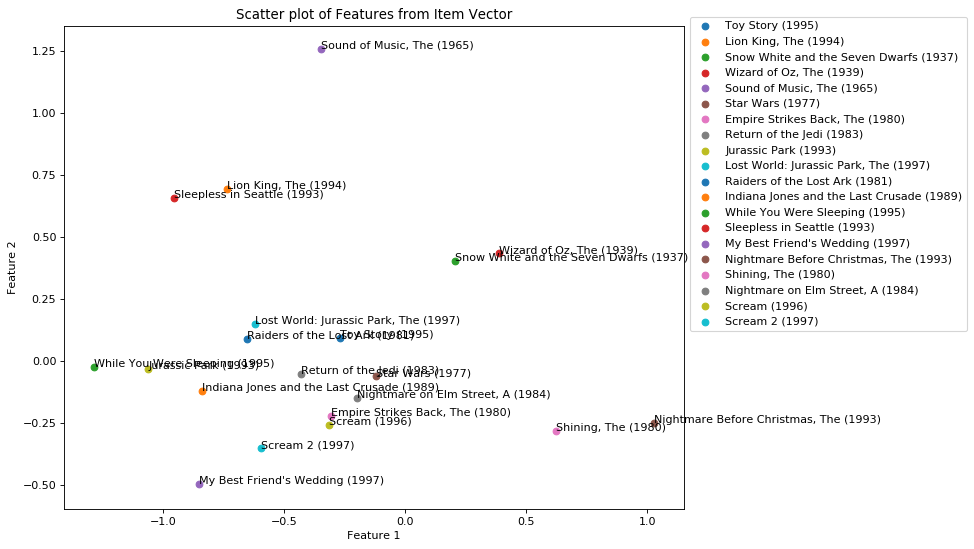

In [112]:
#Still 3C
for i,j in zip(select_movie,names):
    print(j)
    print(model.param_dict['V'][i])
    v_data = model.param_dict['V'][i]
#     print(v_data[0])
#     print(v_data[1])
    v1.append(v_data[0])
    v2.append(v_data[1])
plt.figure(figsize=(10, 8), dpi=80)
for x,y,z in zip(v1,v2,names):
    plt.scatter(x, y, label = z)
    plt.annotate(z, (x,y))
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Features from Item Vector')

In [34]:
#Problem 4a/K: 
## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)

param_grid={'n_factors':[1,5,20,50,100], }
gs_4a = GridSearchCV(SVD, param_grid, measures=['mae'], cv=5, return_train_measures = True, n_jobs = -1)
gs_4a.fit(train_set)

#Make sure while using gridsearchCV to comment out the following lines:
#model = SVD(n_factors=n_factors)
#model.fit(train_set)
#also for this we do not need to build full trainset so we need to comment it
#train_set = train_set.build_full_trainset()

#This for GridSearchCV!!!! 
#If you want to use model.fit you require to have the follwoing code
#train_set = train_set.build_full_trainset()



{'split0_test_mae': array([0.73611582, 0.73496727, 0.73483115, 0.73175949, 0.73345498]), 'split0_train_mae': array([0.72366798, 0.71392384, 0.67900637, 0.61845764, 0.54649711]), 'split1_test_mae': array([0.75339171, 0.75233728, 0.74985998, 0.75024526, 0.7519115 ]), 'split1_train_mae': array([0.71914293, 0.70829193, 0.67210874, 0.61829673, 0.54708073]), 'split2_test_mae': array([0.7500436 , 0.74896627, 0.74689871, 0.74532738, 0.74791707]), 'split2_train_mae': array([0.7211138 , 0.70955385, 0.67476829, 0.61829035, 0.54895504]), 'split3_test_mae': array([0.74752066, 0.748278  , 0.74495542, 0.74360971, 0.74582556]), 'split3_train_mae': array([0.71962263, 0.71011684, 0.67436936, 0.61656807, 0.54989593]), 'split4_test_mae': array([0.74003335, 0.73883408, 0.73567583, 0.7345451 , 0.73727528]), 'split4_train_mae': array([0.72313327, 0.71018009, 0.67668956, 0.61935476, 0.54812498]), 'mean_test_mae': array([0.74542103, 0.74467658, 0.74244421, 0.74109739, 0.74327688]), 'std_test_mae': array([0.006

Text(0.5, 1.0, 'MAEs vs K for M4a on validation data')

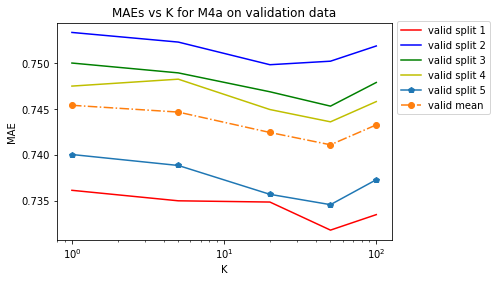

In [126]:
print(gs_4a.cv_results)
# {'split0_test_mae': array([0.73611582, 0.73496727, 0.73483115, 0.73175949, 0.73345498]), 
#  'split0_train_mae': array([0.72366798, 0.71392384, 0.67900637, 0.61845764, 0.54649711]), 
#  'split1_test_mae': array([0.75339171, 0.75233728, 0.74985998, 0.75024526, 0.7519115 ]), 
#  'split1_train_mae': array([0.71914293, 0.70829193, 0.67210874, 0.61829673, 0.54708073]), 
#  'split2_test_mae': array([0.7500436 , 0.74896627, 0.74689871, 0.74532738, 0.74791707]), 
#  'split2_train_mae': array([0.7211138 , 0.70955385, 0.67476829, 0.61829035, 0.54895504]), 
#  'split3_test_mae': array([0.74752066, 0.748278  , 0.74495542, 0.74360971, 0.74582556]), 
#  'split3_train_mae': array([0.71962263, 0.71011684, 0.67436936, 0.61656807, 0.54989593]), 
#  'split4_test_mae': array([0.74003335, 0.73883408, 0.73567583, 0.7345451 , 0.73727528]), 
#  'split4_train_mae': array([0.72313327, 0.71018009, 0.67668956, 0.61935476, 0.54812498]), 
#  'mean_test_mae': array([0.74542103, 0.74467658, 0.74244421, 0.74109739, 0.74327688]), 
#  'std_test_mae': array([0.00640191, 0.00661005, 0.00608132, 0.00689952, 0.00685672]), 
#  'mean_train_mae': array([0.72133612, 0.71041331, 0.67538846, 0.61819351, 0.54811076]), 
#  'std_train_mae': array([0.00181455, 0.00188175, 0.00232215, 0.00090337, 0.00123001]), 
#  'rank_test_mae': array([5, 4, 2, 1, 3]), 
#  'mean_fit_time': array([1.47575917, 1.56135178, 2.1859941 , 4.04589834, 6.84362783]), 
#  'std_fit_time': array([0.21787608, 0.18536344, 0.0951409 , 0.30926234, 0.8357875 ]), 
#  'mean_test_time': array([0.19356313, 0.21030607, 0.19728422, 0.24834948, 0.210359  ]), 
#  'std_test_time': array([0.04219054, 0.07085857, 0.0079104 , 0.00835425, 0.07301802]), 
#  'params': [{'n_factors': 1}, {'n_factors': 5}, {'n_factors': 20}, {'n_factors': 50}, {'n_factors': 100}], 
#  'param_n_factors': [1, 5, 20, 50, 100]}
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split0_test_mae'], 'r-', label = 'valid split 1')
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split1_test_mae'], 'b-', label = 'valid split 2')
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split2_test_mae'], 'g-', label = 'valid split 3')
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split3_test_mae'], 'y-', label = 'valid split 4')
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split4_test_mae'], 'p-', label = 'valid split 5')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split0_train_mae'], 'r-.', label = 'train split 1')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split1_train_mae'], 'b-.', label = 'train split 2')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split2_train_mae'], 'g-.', label = 'train split 3')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split3_train_mae'], 'y-.', label = 'train split 4')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split4_train_mae'], 'p-.', label = 'train split 5')
# plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['mean_train_mae'], 'o', label = 'train mean')
plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['mean_test_mae'], 'o-.', label = 'valid mean')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('MAEs vs K for M4a on validation data')


In [28]:
#Problem 4a/alpha: 
## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)

param_grid={'reg_all':[0,0.02,0.1,0.5,1], }
gs_4b = GridSearchCV(SVD, param_grid, measures=['mae'], cv=5, return_train_measures = True, n_jobs = -1)
gs_4b.fit(train_set)

#Make sure while using gridsearchCV to comment out the following lines:
#model = SVD(n_factors=n_factors)
#model.fit(train_set)
#also for this we do not need to build full trainset so we need to comment it
#train_set = train_set.build_full_trainset()

#This for GridSearchCV!!!! 
#If you want to use model.fit you require to have the follwoing code
#train_set = train_set.build_full_trainset()

{'split0_test_mae': array([0.75905531, 0.74505468, 0.74628519, 0.77481581, 0.80351154]), 'split0_train_mae': array([0.49048743, 0.5477532 , 0.68025947, 0.75585713, 0.78934286]), 'split1_test_mae': array([0.75059161, 0.74143531, 0.74599742, 0.7730466 , 0.80211917]), 'split1_train_mae': array([0.48691795, 0.54778332, 0.68230412, 0.75674642, 0.79017057]), 'split2_test_mae': array([0.75492503, 0.74320351, 0.74878326, 0.77562212, 0.80434888]), 'split2_train_mae': array([0.48629265, 0.54765957, 0.6815746 , 0.75604211, 0.78951563]), 'split3_test_mae': array([0.75217103, 0.74382436, 0.74547299, 0.77061661, 0.798216  ]), 'split3_train_mae': array([0.4846699 , 0.54734265, 0.68218729, 0.75666722, 0.79035048]), 'split4_test_mae': array([0.75350908, 0.74535265, 0.74795069, 0.77562355, 0.80527022]), 'split4_train_mae': array([0.48930531, 0.54789741, 0.68242044, 0.75666939, 0.79009078]), 'mean_test_mae': array([0.75405041, 0.7437741 , 0.74689791, 0.77394494, 0.80269316]), 'std_test_mae': array([0.002

Text(0.5, 1.0, 'MAEs vs alpha for M4b on validation data')

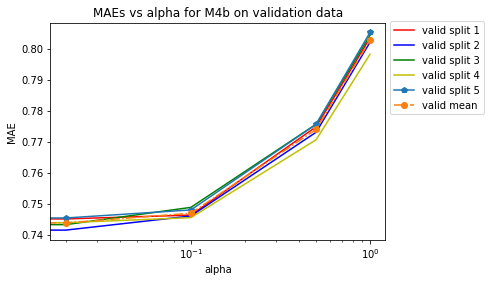

In [127]:
print(gs_4b.cv_results)
# {'split0_test_mae': array([0.75905531, 0.74505468, 0.74628519, 0.77481581, 0.80351154]), 
#  'split0_train_mae': array([0.49048743, 0.5477532 , 0.68025947, 0.75585713, 0.78934286]), 
#  'split1_test_mae': array([0.75059161, 0.74143531, 0.74599742, 0.7730466 , 0.80211917]), 
#  'split1_train_mae': array([0.48691795, 0.54778332, 0.68230412, 0.75674642, 0.79017057]), 
#  'split2_test_mae': array([0.75492503, 0.74320351, 0.74878326, 0.77562212, 0.80434888]), 
#  'split2_train_mae': array([0.48629265, 0.54765957, 0.6815746 , 0.75604211, 0.78951563]), 
#  'split3_test_mae': array([0.75217103, 0.74382436, 0.74547299, 0.77061661, 0.798216  ]), 
#  'split3_train_mae': array([0.4846699 , 0.54734265, 0.68218729, 0.75666722, 0.79035048]), 
#  'split4_test_mae': array([0.75350908, 0.74535265, 0.74795069, 0.77562355, 0.80527022]), 
#  'split4_train_mae': array([0.48930531, 0.54789741, 0.68242044, 0.75666939, 0.79009078]), 
#  'mean_test_mae': array([0.75405041, 0.7437741 , 0.74689791, 0.77394494, 0.80269316]), 
#  'std_test_mae': array([0.00288452, 0.00140924, 0.00125536, 0.00191175, 0.00246685]), 
#  'mean_train_mae': array([0.48753465, 0.54768723, 0.68174918, 0.75639645, 0.78989406]), 
#  'std_train_mae': array([0.00209685, 0.00018829, 0.00080003, 0.0003706 , 0.00039256]), 
#  'rank_test_mae': array([3, 1, 2, 4, 5]), 
#  'mean_fit_time': array([7.39480863, 8.30412507, 8.21575189, 8.25650992, 7.16585379]), 
#  'std_fit_time': array([0.97615183, 0.06460323, 0.02671688, 0.03778184, 1.17584622]), 
#  'mean_test_time': array([0.29396081, 0.29369421, 0.29032984, 0.28560119, 0.19835896]), 
#  'std_test_time': array([0.00950246, 0.0083485 , 0.00636358, 0.00444538, 0.06270067]), 
#  'params': [{'reg_all': 0}, {'reg_all': 0.02}, {'reg_all': 0.1}, {'reg_all': 0.5}, {'reg_all': 1}], 
#  'param_reg_all': [0, 0.02, 0.1, 0.5, 1]}
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['split0_test_mae'], 'r-', label = 'valid split 1')
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['split1_test_mae'], 'b-', label = 'valid split 2')
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['split2_test_mae'], 'g-', label = 'valid split 3')
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['split3_test_mae'], 'y-', label = 'valid split 4')
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['split4_test_mae'], 'p-', label = 'valid split 5')
plt.plot(gs_4b.cv_results['param_reg_all'], gs_4b.cv_results['mean_test_mae'], 'o-.', label = 'valid mean')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAEs vs alpha for M4b on validation data')

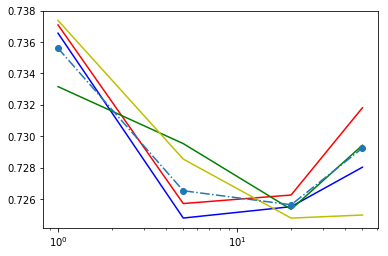

In [57]:
#Problem 5/K: 
## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)
#'reg_all':[0,0.02,0.1,0.5,1]
param_grid={'n_factors':[1,5,20,50], }
gs_5a = GridSearchCV(SVDpp, param_grid, measures=['mae'], cv=5, return_train_measures = True, n_jobs = -1)
gs_5a.fit(train_set)

#Make sure while using gridsearchCV to comment out the following lines:
#model = SVD(n_factors=n_factors)
#model.fit(train_set)
#also for this we do not need to build full trainset so we need to comment it
#train_set = train_set.build_full_trainset()

#This for GridSearchCV!!!! 
#If you want to use model.fit you require to have the follwoing code
#train_set = train_set.build_full_trainset()


{'split0_test_mae': array([0.73708347, 0.72571521, 0.72625835, 0.73180989]), 'split0_train_mae': array([0.70660721, 0.66967566, 0.60039383, 0.51521391]), 'split1_test_mae': array([0.73655413, 0.72479261, 0.72551674, 0.72802699]), 'split1_train_mae': array([0.70708826, 0.66615095, 0.60105979, 0.51592366]), 'split2_test_mae': array([0.73315578, 0.72953033, 0.72534776, 0.72942592]), 'split2_train_mae': array([0.70036218, 0.67167758, 0.59992631, 0.51793997]), 'split3_test_mae': array([0.73736748, 0.72854421, 0.72478817, 0.72498562]), 'split3_train_mae': array([0.70834864, 0.67377529, 0.60151962, 0.51270943]), 'split4_test_mae': array([0.73382698, 0.72406674, 0.72627475, 0.73196839]), 'split4_train_mae': array([0.69944181, 0.66177016, 0.59775851, 0.51740728]), 'mean_test_mae': array([0.73559757, 0.72652982, 0.72563715, 0.72924336]), 'std_test_mae': array([0.0017523 , 0.00213584, 0.0005677 , 0.00259438]), 'mean_train_mae': array([0.70436962, 0.66860992, 0.60013161, 0.51583885]), 'std_train_m

Text(0.5, 1.0, 'MAEs vs K for M5a on validation data')

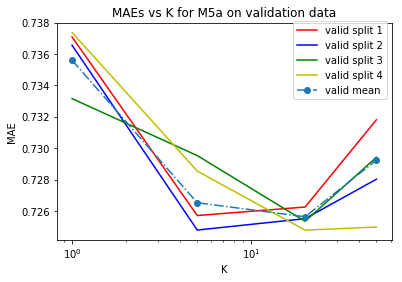

In [133]:
print(gs_5a.cv_results)
# {'split0_test_mae': array([0.72838117, 0.72631313, 0.72601045, 0.72748549]), 
#  'split0_train_mae': array([0.69653915, 0.66690976, 0.60338243, 0.51836286]), 
#  'split1_test_mae': array([0.73940899, 0.72734013, 0.72276772, 0.73046706]), 
#  'split1_train_mae': array([0.70834127, 0.66695173, 0.60216599, 0.5155606 ]), 
#  'split2_test_mae': array([0.73534145, 0.72805322, 0.72233894, 0.72700102]), 
#  'split2_train_mae': array([0.7011576 , 0.66740611, 0.60112753, 0.51375778]), 
#  'split3_test_mae': array([0.73612782, 0.72200094, 0.71606057, 0.72167795]), 
#  'split3_train_mae': array([0.71563366, 0.67548485, 0.60088012, 0.51927376]), 
#  'split4_test_mae': array([0.73588738, 0.73457913, 0.73623743, 0.7386686 ]), 
#  'split4_train_mae': array([0.69234888, 0.66251959, 0.59956162, 0.51638845]), 
#  'mean_test_mae': array([0.73502936, 0.72765731, 0.72468302, 0.72906002]), 
#  'std_test_mae': array([0.00361718, 0.00404896, 0.00661477, 0.00557706]), 
#  'mean_train_mae': array([0.70280411, 0.66785441, 0.60142354, 0.51666869]), 
#  'std_train_mae': array([0.00832502, 0.00420933, 0.0012836 , 0.00197162]), 
#  'rank_test_mae': array([4, 2, 1, 3]), 
#  'mean_fit_time': array([145.59033108, 163.59046845, 263.6202764 , 411.44680943]), 
#  'std_fit_time': array([ 2.37061551,  6.65404881,  3.62275373, 54.20092025]), 
#  'mean_test_time': array([5.08623209, 5.0707921 , 4.61992989, 3.3490365 ]), 
#  'std_test_time': array([0.10277593, 0.60223399, 0.46850093, 0.93760928]), 
#  'params': [{'n_factors': 1}, {'n_factors': 5}, {'n_factors': 20}, {'n_factors': 50}], 
#  'param_n_factors': [1, 5, 20, 50]}

plt.plot(gs_5a.cv_results['param_n_factors'], gs_5a.cv_results['split0_test_mae'], 'r-', label = 'valid split 1')
plt.plot(gs_5a.cv_results['param_n_factors'], gs_5a.cv_results['split1_test_mae'], 'b-', label = 'valid split 2')
plt.plot(gs_5a.cv_results['param_n_factors'], gs_5a.cv_results['split2_test_mae'], 'g-', label = 'valid split 3')
plt.plot(gs_5a.cv_results['param_n_factors'], gs_5a.cv_results['split3_test_mae'], 'y-', label = 'valid split 4')
#plt.plot(gs_4a.cv_results['param_n_factors'], gs_4a.cv_results['split4_test_mae'], 'p-', label = 'valid split 5')
plt.plot(gs_5a.cv_results['param_n_factors'], gs_5a.cv_results['mean_test_mae'], 'o-.', label = 'valid mean')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('MAEs vs K for M5a on validation data')


In [129]:
#Problem 5a/alpha: 
## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)

param_grid={'reg_all':[0,0.02,0.1,0.5,1], }
gs_5b = GridSearchCV(SVDpp, param_grid, measures=['mae'], cv=5, return_train_measures = True, n_jobs = -1)
gs_5b.fit(train_set)

#Make sure while using gridsearchCV to comment out the following lines:
#model = SVD(n_factors=n_factors)
#model.fit(train_set)
#also for this we do not need to build full trainset so we need to comment it
#train_set = train_set.build_full_trainset()

#This for GridSearchCV!!!! 
#If you want to use model.fit you require to have the follwoing code
#train_set = train_set.build_full_trainset()

{'split0_test_mae': array([0.74518607, 0.72689617, 0.74027577, 0.77303504, 0.80250383]), 'split0_train_mae': array([0.52308442, 0.60175072, 0.70163527, 0.75738641, 0.79072095]), 'split1_test_mae': array([0.7488007 , 0.72916427, 0.74537369, 0.77810319, 0.80811379]), 'split1_train_mae': array([0.52277328, 0.60092466, 0.70262191, 0.75616911, 0.78945585]), 'split2_test_mae': array([0.74217103, 0.7227595 , 0.73877413, 0.77078449, 0.80007507]), 'split2_train_mae': array([0.52364668, 0.60089679, 0.70327197, 0.75758975, 0.7909175 ]), 'split3_test_mae': array([0.74580674, 0.72726989, 0.74185456, 0.77400778, 0.80287143]), 'split3_train_mae': array([0.52174317, 0.59791659, 0.69975415, 0.75612631, 0.78960279]), 'split4_test_mae': array([0.75142377, 0.72327664, 0.74110247, 0.77225202, 0.80183471]), 'split4_train_mae': array([0.52356522, 0.59937242, 0.70269651, 0.75681812, 0.79027138]), 'mean_test_mae': array([0.74667766, 0.72587329, 0.74147612, 0.7736365 , 0.80307977]), 'std_test_mae': array([0.003

Text(0.5, 1.0, 'MAEs vs alpha for M5b on validation data')

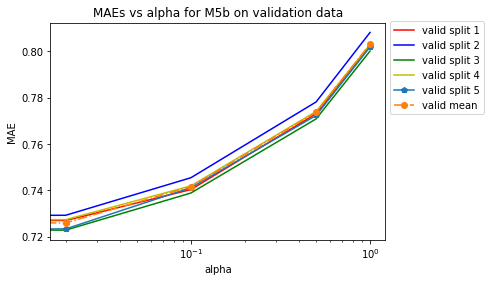

In [132]:
print(gs_5b.cv_results)
#results: 
# {'split0_test_mae': array([0.74592749, 0.73042792, 0.74493058, 0.77530294, 0.80379608]), 
#  'split0_train_mae': array([0.52012634, 0.59927737, 0.7027076 , 0.75524771, 0.7880745 ]), 
#  'split1_test_mae': array([0.74554568, 0.73082609, 0.74640546, 0.7793063 , 0.80778665]), 
#  'split1_train_mae': array([0.52199833, 0.59923447, 0.69942971, 0.75418213, 0.78721283]), 
#  'split2_test_mae': array([0.7396434 , 0.71953227, 0.73257194, 0.76721465, 0.79678117]), 
#  'split2_train_mae': array([0.52234972, 0.59944817, 0.69882031, 0.75648838, 0.78946265]), 
#  'split3_test_mae': array([0.74285767, 0.72170034, 0.73765176, 0.77073833, 0.80058446]), 
#  'split3_train_mae': array([0.52445608, 0.60204703, 0.70131774, 0.75635348, 0.78922831]), 
#  'split4_test_mae': array([0.74820485, 0.7271331 , 0.73917914, 0.77059759, 0.799285  ]), 
#  'split4_train_mae': array([0.51825763, 0.59721932, 0.69935623, 0.75646408, 0.78949968]), 
#  'mean_test_mae': array([0.74443582, 0.72592395, 0.74014778, 0.77263196, 0.80164667]), 
#  'std_test_mae': array([0.00293668, 0.00457102, 0.00503181, 0.00421314, 0.00381309]), 
#  'mean_train_mae': array([0.52143762, 0.59944527, 0.70032632, 0.75574716, 0.78869559]), 
#  'std_train_mae': array([0.00210186, 0.00153601, 0.00146058, 0.00090882, 0.00090588]), 
#  'rank_test_mae': array([3, 1, 2, 4, 5]), 
#  'mean_fit_time': array([283.38966055, 282.26623793, 282.68020358, 281.54325542, 226.11954141]), 
#  'std_fit_time': array([ 0.95358712,  1.08197574,  1.52800932,  0.64889467, 46.60491466]), 
#  'mean_test_time': array([5.45316772, 5.49756522, 5.4182117 , 5.35354919, 4.05788116]), 
#  'std_test_time': array([0.2830915 , 0.23226802, 0.18925369, 0.19678338, 0.87082591]), 
#  'params': [{'reg_all': 0}, {'reg_all': 0.02}, {'reg_all': 0.1}, {'reg_all': 0.5}, {'reg_all': 1}], 
#  'param_reg_all': [0, 0.02, 0.1, 0.5, 1]}

plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['split0_test_mae'], 'r-', label = 'valid split 1')
plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['split1_test_mae'], 'b-', label = 'valid split 2')
plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['split2_test_mae'], 'g-', label = 'valid split 3')
plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['split3_test_mae'], 'y-', label = 'valid split 4')
plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['split4_test_mae'], 'p-', label = 'valid split 5')
plt.plot(gs_5b.cv_results['param_reg_all'], gs_5b.cv_results['mean_test_mae'], 'o-.', label = 'valid mean')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAEs vs alpha for M5b on validation data')

In [149]:
param_grid={'n_factors':[20],'reg_all':[0.02], }
# gs_5c = GridSearchCV(SVDpp, param_grid, measures=['mae'], cv=5, return_train_measures = True, n_jobs = -1, refit = True)
gs_5d = SVDpp(n_factors = 20, reg_all = 0.02)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)
train_set = train_set.build_full_trainset()
gs_5d.fit(train_set)


In [152]:
test_df = pd.read_csv(os.path.join('./data_movie_lens_100k/ratings_test_masked.csv'))
predicted = []
for row in test_df.values:
        userid = row[0]
        itemid = row[1]
        rhat = gs_5d.predict(userid, itemid)
        predicted.append(rhat.est)

np.savetxt('predicted_ratings_test.txt', predicted)